In [ ]:
import os
import csv
import glob

csv_directory = '/Coursework'
output_directory = '/Coursework/data/interval200'

csv_files = glob.glob(os.path.join(csv_directory, '*avg_balance.csv'))

for csv_file in csv_files:
    file_number = csv_file.split('_')[3]
    print(f"Processing file: {file_number}")
    
    output_file = os.path.join(output_directory, f'data_{file_number}.csv')
    
    with open(output_file, 'w', newline='') as outfile:
        writer = csv.writer(outfile)
        writer.writerow(['session', 'time', 'MMM01_profit', 'MMM02_profit', 'MMM02_PLUS_profit'])
        
        with open(csv_file, 'r') as infile:
            reader = csv.reader(infile)
            next(reader)
            
            total_rows = sum(1 for _ in reader)
            interval = total_rows // 200

            infile.seek(0)
            next(reader)

            writer.writerow([1, 0, 1000, 1000, 1000])
            print("Data at time 0 processed (all profits are 1000)")
            
            for i, row in enumerate(reader, start=2):
                if i % interval == 0:
                    print(f"Processing row: {i}")
                    
                    MMM01_profit = ''
                    MMM02_profit = ''
                    MMM02_PLUS_profit = ''
                    unified_time = int(row[1])
                    
                    for j in range(4, len(row), 4):
                        if row[j] == ' MMM01':
                            MMM01_profit = row[j+1]
                        elif row[j] == ' MMM02':
                            MMM02_profit = row[j+1]
                        elif row[j] == ' MMM02_PLUS':
                            MMM02_PLUS_profit = row[j+1]
                    
                    # 写入输出文件
                    writer.writerow([i // interval + 1, unified_time, MMM01_profit, MMM02_profit, MMM02_PLUS_profit])
    
    print(f"File {file_number} processed successfully!")

Processing file: 0012
Data at time 0 processed (all profits are 1000)
Processing row: 4566
Processing row: 9132
Processing row: 13698
Processing row: 18264
Processing row: 22830
Processing row: 27396
Processing row: 31962
Processing row: 36528
Processing row: 41094
Processing row: 45660
Processing row: 50226
Processing row: 54792
Processing row: 59358
Processing row: 63924
Processing row: 68490
Processing row: 73056
Processing row: 77622
Processing row: 82188
Processing row: 86754
Processing row: 91320
Processing row: 95886
Processing row: 100452
Processing row: 105018
Processing row: 109584
Processing row: 114150
Processing row: 118716
Processing row: 123282
Processing row: 127848
Processing row: 132414
Processing row: 136980
Processing row: 141546
Processing row: 146112
Processing row: 150678
Processing row: 155244
Processing row: 159810
Processing row: 164376
Processing row: 168942
Processing row: 173508
Processing row: 178074
Processing row: 182640
Processing row: 187206
Processing

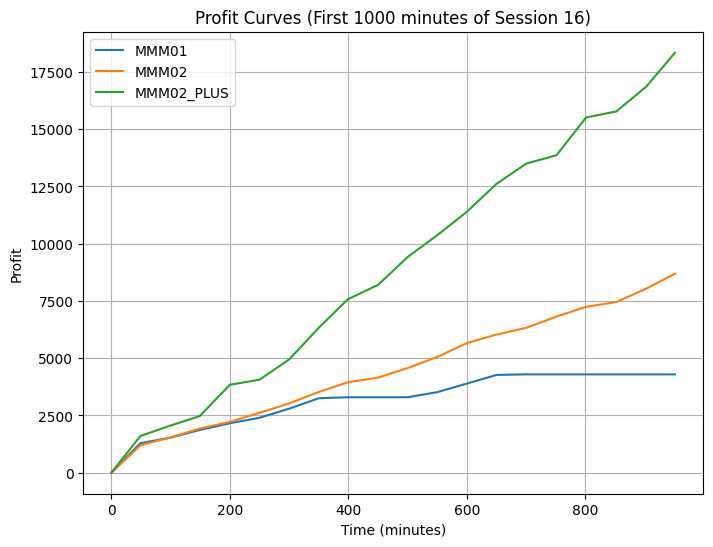

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_profit_curves(n):
    file_path = f'/Coursework/data/interval200/data_00{n}.csv'
    data = pd.read_csv(file_path)
    data = data[:20]

    data['time_minutes'] = data['time'] // 60

    plt.figure(figsize=(8, 6))
    plt.plot(data['time_minutes'], data['MMM01_profit'], label='MMM01')
    plt.plot(data['time_minutes'], data['MMM02_profit'], label='MMM02')
    plt.plot(data['time_minutes'], data['MMM02_PLUS_profit'], label='MMM02_PLUS')

    plt.legend()
    plt.title(f'Profit Curves (First 1000 minutes of Session {n})')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Profit')

    plt.grid(True)
    plt.show()

plot_profit_curves(16)
plot_profit_curves(24)

In [100]:
import glob
import csv

file_paths = glob.glob('*avg_balance.csv')

profits_col9 = []
profits_col13 = []
profits_col17 = []

for file_path in file_paths:
    with open(file_path, 'r') as f:
        reader = csv.reader(f)
        rows = list(reader)
        last_row = rows[-1]
        profits_col9.append(float(last_row[9]))
        profits_col13.append(float(last_row[13]))
        profits_col17.append(float(last_row[17]))

max_profit_col9 = max(profits_col9)
min_profit_col9 = min(profits_col9)

max_profit_col13 = max(profits_col13)
min_profit_col13 = min(profits_col13)

max_profit_col17 = max(profits_col17)
min_profit_col17 = min(profits_col17)

print(f'Maximum profit (MMM 01): {max_profit_col9} (File: {file_paths[profits_col9.index(max_profit_col9)]})')
print(f'Minimum profit (MMM 01): {min_profit_col9} (File: {file_paths[profits_col9.index(min_profit_col9)]})')

print(f'Maximum profit (MMM 02): {max_profit_col13} (File: {file_paths[profits_col13.index(max_profit_col13)]})')
print(f'Minimum profit (MMM 02): {min_profit_col13} (File: {file_paths[profits_col13.index(min_profit_col13)]})')

print(f'Maximum profit (MMM 02 PLUS): {max_profit_col17} (File: {file_paths[profits_col17.index(max_profit_col17)]})')
print(f'Minimum profit (MMM 02 PLUS): {min_profit_col17} (File: {file_paths[profits_col17.index(min_profit_col17)]})')

Maximum profit (MMM 01): 69587.0 (File: bse_d022_i10_0028_avg_balance.csv)
Minimum profit (MMM 01): 3699.0 (File: bse_d022_i10_0018_avg_balance.csv)
Maximum profit (MMM 02): 105519.0 (File: bse_d022_i10_0016_avg_balance.csv)
Minimum profit (MMM 02): 71968.0 (File: bse_d022_i10_0021_avg_balance.csv)
Maximum profit (MMM 02 PLUS): 248575.0 (File: bse_d022_i10_0016_avg_balance.csv)
Minimum profit (MMM 02 PLUS): 167227.0 (File: bse_d022_i10_0024_avg_balance.csv)


In [23]:
import math
import csv
import os

max_drawdown = 0
avg_returns = []

for filename in os.listdir("/Coursework"):
    if filename.endswith("avg_balance.csv"):
        file_path = os.path.join("/Coursework/", filename)
        profits = []
        with open(file_path, 'r') as f:
            reader = csv.reader(f)
            next(reader)
            for row in reader:
                profit = float(row[17])
                profits.append(profit)

        peak = max(profits)
        peak_index = profits.index(peak)
        trough = min(profits[peak_index:])
        max_drawdown = max(max_drawdown, (peak - trough) / peak)

        initial_profit = 1000
        final_profit = profits[-1]
        returns = (final_profit - initial_profit) / initial_profit
        avg_returns.append(returns)

avg_return = sum(avg_returns) / len(avg_returns)

std_dev = math.sqrt(sum([(r - avg_return)**2 for r in avg_returns]) / len(avg_returns))

downside_returns = [r for r in avg_returns if r < 0]
downside_std_dev = math.sqrt(sum([r**2 for r in downside_returns]) / len(downside_returns)) if downside_returns else 0

sharpe_ratio = avg_return / std_dev if std_dev != 0 else 0
sortino_ratio = avg_return / downside_std_dev if downside_std_dev != 0 else 0
calmar_ratio = avg_return / max_drawdown if max_drawdown != 0 else 0

print(f'Average Return: {avg_return * 100:.2f}%')
print(f'Maximum Drawdown: {max_drawdown * 100:.2f}%')
print(f'Standard Deviation: {std_dev:.2f}')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
print(f'Sortino Ratio: {sortino_ratio:.2f}')
print(f'Calmar Ratio: {calmar_ratio:.2f}')


Average Return: 20038.54%
Maximum Drawdown: 0.27%
Standard Deviation: 18.69
Sharpe Ratio: 10.72
Sortino Ratio: 0.00
Calmar Ratio: 74337.23


In [24]:
import math
import csv
import os

max_drawdown = 0
avg_returns = []

for filename in os.listdir("/Coursework"):
    if filename.endswith("avg_balance.csv"):
        file_path = os.path.join("/Coursework/", filename)
        profits = []
        with open(file_path, 'r') as f:
            reader = csv.reader(f)
            next(reader)
            for row in reader:
                profit = float(row[13])
                profits.append(profit)

        peak = max(profits)
        peak_index = profits.index(peak)
        trough = min(profits[peak_index:])
        max_drawdown = max(max_drawdown, (peak - trough) / peak)

        initial_profit = 1000
        final_profit = profits[-1]
        returns = (final_profit - initial_profit) / initial_profit
        avg_returns.append(returns)

avg_return = sum(avg_returns) / len(avg_returns)
std_dev = math.sqrt(sum([(r - avg_return)**2 for r in avg_returns]) / len(avg_returns))

downside_returns = [r for r in avg_returns if r < 0]
downside_std_dev = math.sqrt(sum([r**2 for r in downside_returns]) / len(downside_returns)) if downside_returns else 0

sharpe_ratio = avg_return / std_dev if std_dev != 0 else 0

sortino_ratio = avg_return / downside_std_dev if downside_std_dev != 0 else 0
calmar_ratio = avg_return / max_drawdown if max_drawdown != 0 else 0

print(f'Average Return: {avg_return * 100:.2f}%')
print(f'Maximum Drawdown: {max_drawdown * 100:.2f}%')
print(f'Standard Deviation: {std_dev:.2f}')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
print(f'Sortino Ratio: {sortino_ratio:.2f}')
print(f'Calmar Ratio: {calmar_ratio:.2f}')


Average Return: 8584.92%
Maximum Drawdown: 0.15%
Standard Deviation: 7.68
Sharpe Ratio: 11.19
Sortino Ratio: 0.00
Calmar Ratio: 57293.21


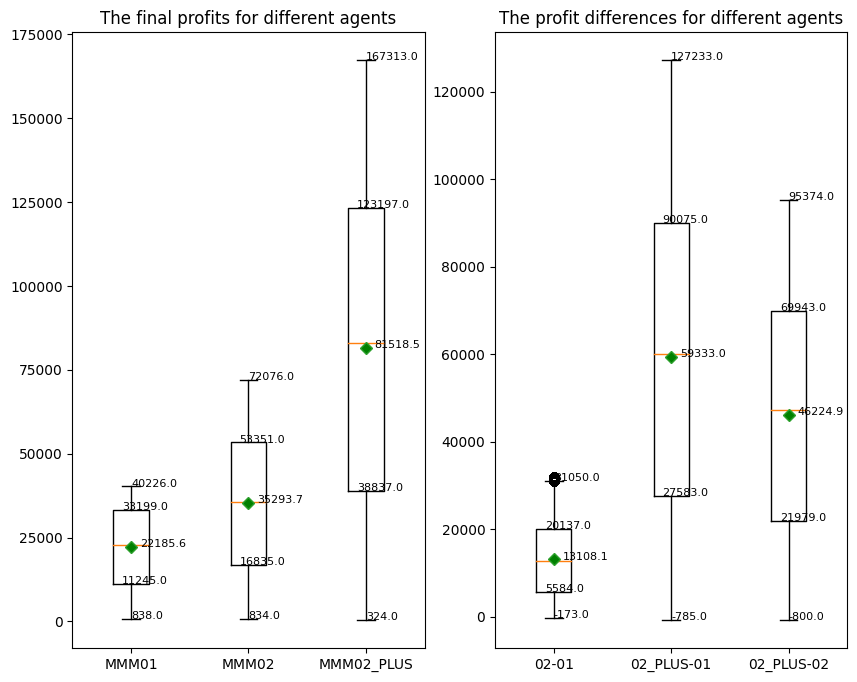

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from pylab import *

np.random.seed(19680801)

csv_file = open("/Coursework/bse_d022_i10_0021_avg_balance.csv","r")
csv_reader = csv.reader(csv_file)

y1 = []
y2 = []
y3 = []

next(csv_reader)

for item in csv_reader:
    y1.append(int(float(item[9])))
    y2.append(int(float(item[13])))
    y3.append(int(float(item[17])))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

data = [y1, y2, y3]
names = ['MMM01', 'MMM02', 'MMM02_PLUS']

ax1.set_title('The final profits for different agents')
green_diamond = dict(markerfacecolor='g', marker='D')
dp1= ax1.boxplot(data,vert=True,whis=0.75,notch=False, labels=names,showmeans=True,meanline=False,meanprops=green_diamond)

for index in range(len(dp1['means'])):
    y = dp1['means'][index].get_ydata()[0]
    x = dp1['means'][index].get_xdata()[0]
    ax1.text(x + 0.075, y, '%.1f' % y, horizontalalignment='left', fontsize=8)

for index in range(len(dp1['boxes'])):
    y = dp1['boxes'][index].get_ydata()[0]
    x = dp1['boxes'][index].get_xdata()[0]
    ax1.text(x + 0.075, y, '%.1f' % y, horizontalalignment='left', fontsize=8)
    y = dp1['boxes'][index].get_ydata()[2]
    ax1.text(x + 0.075, y, '%.1f' % y, horizontalalignment='left', fontsize=8)

for index in range(len(dp1['caps'])):
    y = dp1['caps'][index].get_ydata()[0]
    x = dp1['caps'][index].get_xdata()[0]
    ax1.text(x + 0.075, y, '%.1f' % y, horizontalalignment='left', fontsize=8)

dif1 = []
dif2 = []
dif3 = []
for i in range(len(y1)):
    dif1.append(y2[i]-y1[i])
    dif2.append(y3[i]-y1[i])
    dif3.append(y3[i]-y2[i])

ax2.set_title('The profit differences for different agents')
dp2 = ax2.boxplot([dif1,dif2,dif3],vert=True,whis=0.75,notch=False, showmeans=True,labels=['02-01','02_PLUS-01','02_PLUS-02'],meanprops=green_diamond)

for index in range(len(dp2['means'])):
    y = dp2['means'][index].get_ydata()[0]
    x = dp2['means'][index].get_xdata()[0]
    ax2.text(x + 0.075, y, '%.1f' % y, horizontalalignment='left', fontsize=8)
        
for index in range(len(dp2['boxes'])):
    y = dp2['boxes'][index].get_ydata()[0]
    x = dp2['boxes'][index].get_xdata()[0]
    ax2.text(x + 0.075, y, '%.1f' % y, horizontalalignment='left', fontsize=8)
    y = dp2['boxes'][index].get_ydata()[2]
    ax2.text(x + 0.075, y, '%.1f' % y, horizontalalignment='left', fontsize=8)
        
for index in range(len(dp2['caps'])):
    y = dp2['caps'][index].get_ydata()[0] 
    x = dp2['caps'][index].get_xdata()[0]
    ax2.text(x + 0.075, y, '%.1f' % y, horizontalalignment='left', fontsize=8)
        
plt.show()

In [27]:
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

import scipy.stats as stats
import csv
csv_file = open("/Coursework/bse_d022_i10_0016_avg_balance.csv","r")
csv_reader = csv.reader(csv_file)

next(csv_reader)

y1 = []
y2 = []
y3 = []
name1 = None
name2 = None
name3 = None
count = 0

for item in csv_reader:
    y1.append(int(float(item[9])))
    y2.append(int(float(item[17])))
    name1 = item[2]
    name2 = item[14]
    count += 1

print("\n===== Mann-Whitney U Test =====")
u_statistic, pVal = stats.mannwhitneyu(y1, y2, alternative='less')
print("U statistic for MMM01 and MMM02_PLUS is: %f" % u_statistic)
print("p-value is: %f" % pVal)

import numpy as np
print("\n===== Confidence Intervals =====")
print("Column MMM02_PLUS Mean:")
print(np.mean(y2))
print("95%% Confidence Interval:", stats.t.interval(alpha=0.95, df=len(y2)-1, loc=np.mean(y2), scale=stats.sem(y2)))

print("\nColumn MMM01 Mean:")
print(np.mean(y1))
print("95%% Confidence Interval:", stats.t.interval(alpha=0.95, df=len(y1)-1, loc=np.mean(y1), scale=stats.sem(y1)))

print("\n===== Difference between MMM01 and MMM02_PLUS =====")
df = []
for index in range(len(y1)):
    df.append(y2[index]-y1[index])

print("Mean Difference:")
print(np.mean(df))
print("95%% Confidence Interval for Mean Difference:", stats.t.interval(alpha=0.95, df=len(df)-1, loc=np.mean(df), scale=stats.sem(df)))


===== Mann-Whitney U Test =====
U statistic for MMM01 and MMM02_PLUS is: 19477510464.500000
p-value is: 0.000000

===== Confidence Intervals =====
Column MMM02_PLUS Mean:
120817.38923876846
95%% Confidence Interval: (120667.28601152732, 120967.4924660096)

Column MMM01 Mean:
4191.468284582063
95%% Confidence Interval: (4190.52930893319, 4192.407260230935)

===== Difference between MMM01 and MMM02_PLUS =====
Mean Difference:
116625.9209541864
95%% Confidence Interval for Mean Difference: (116476.15455073063, 116775.68735764216)
